In [1]:
from common import Operator
from autograd import DataNode, Tensor, Device
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

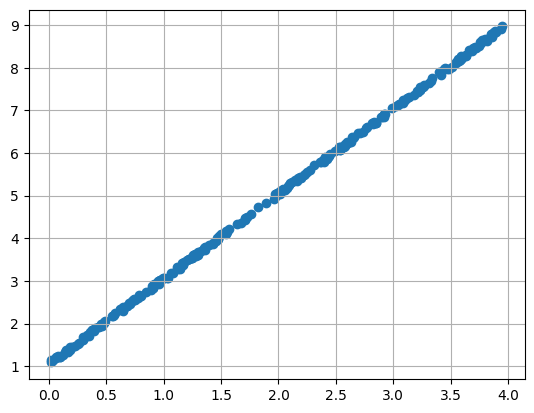

In [2]:
n_sample, n_feature = 256, 1
X = np.random.random((n_sample, n_feature)) * 4.0
noise = np.random.random((n_sample, 1)) * 0.1
Y = 2 * X + 1 + noise

X_a, Y_a = X.copy(), Y.copy()

plt.scatter(X, Y)
plt.grid()
plt.show()
plt.close()

In [3]:
DEVICE = Device.CPU

X = DataNode(Tensor.from_numpy(X), requires_grad=False)
Y = DataNode(Tensor.from_numpy(Y), requires_grad=False)

w = DataNode(Tensor.zeros((n_feature, 1), DEVICE))
b = DataNode(Tensor.zeros((1, ), DEVICE))

In [4]:
loss_tol = 1e-4
lr = 1e-4
max_iter: int = 100

for _ in range(max_iter):
    l = DataNode.matmul(X, w) + b - Y
    loss = l * l
    item = Tensor.sum_all(loss.tensor) / 2 /  len(X.tensor)

    if item < loss_tol:
        break

    loss.backward()
    w.tensor -= w.grad * lr
    b.tensor -= b.grad * lr
    DataNode.zero_grad()

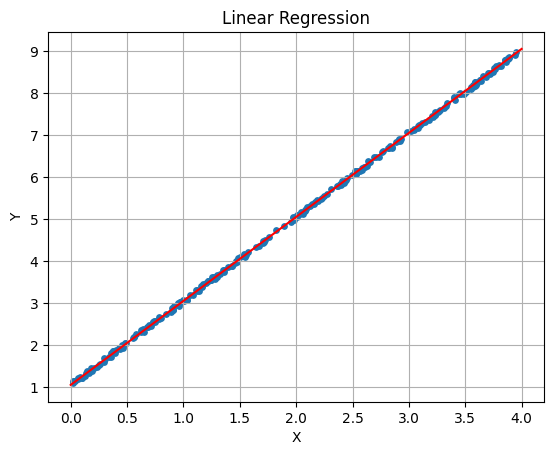

/tmp/ipykernel_3245279/1079255970.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


In [5]:
plt.scatter( X_a, Y_a, sizes=np.array([15]) )
plt.grid()

# plot wx + b
w = w.tensor.to_list()[0]
b = b.tensor.to_list()[0]
x = np.linspace(0, 4, 100)
y = w * x + b
plt.plot(x, y, color='red', label='wx + b')

plt.title('Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
plt.legend()
plt.close()

In [6]:
print(w, b)

[2.0009748935699463] 1.0471909046173096
